<a href="https://colab.research.google.com/github/harikaa2021/job_market_trend/blob/main/ADM_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wordcloud
!pip install scikit-learn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/ADM/large_job_data.csv')  # Replace with your file path
df.head()

,salary,job_title,location,company,domain,skills
0,103621,Software Engineer,Boston,AI Solutions,Software Engineering,"R, Machine Learning, Docker"
1,127223,Data Analyst,Austin,Techies,Data Science,"SQL, Excel, TensorFlow"
2,114849,Backend Developer,Los Angeles,DevTech,Software Engineering,"R, Machine Learning"
3,140867,Backend Developer,San Francisco,DataCo,Software Engineering,"R, Kubernetes, Java"
4,123651,Data Scientist,Seattle,CodeLab,Software Engineering,"Excel, React, SQL, Node.js, Kubernetes"


In [7]:
df = df.dropna(subset=['salary', 'job_title', 'location', 'company', 'domain'])
df = df[df['salary'] > 0]  # Removing rows with salary <= 0

In [8]:
label_encoder_job_title = LabelEncoder()
label_encoder_location = LabelEncoder()
label_encoder_company = LabelEncoder()
label_encoder_domain = LabelEncoder()

# Fit the label encoders on respective columns
df['job_title_encoded'] = label_encoder_job_title.fit_transform(df['job_title'])
df['location_encoded'] = label_encoder_location.fit_transform(df['location'])
df['company_encoded'] = label_encoder_company.fit_transform(df['company'])
df['domain_encoded'] = label_encoder_domain.fit_transform(df['domain'])  # Encoding domain

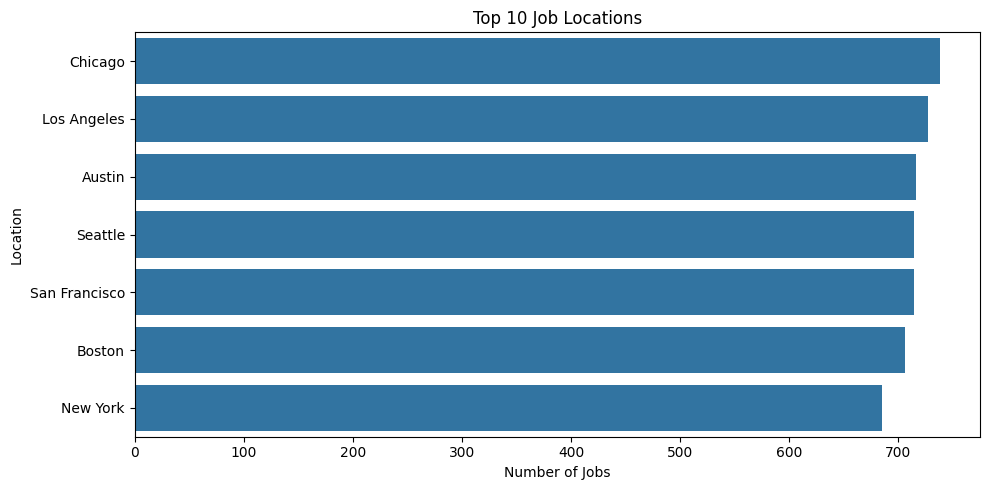

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(y='location', data=df, order=df['location'].value_counts().head(10).index)
plt.title("Top 10 Job Locations")
plt.xlabel("Number of Jobs")
plt.ylabel("Location")
plt.tight_layout()
plt.show()


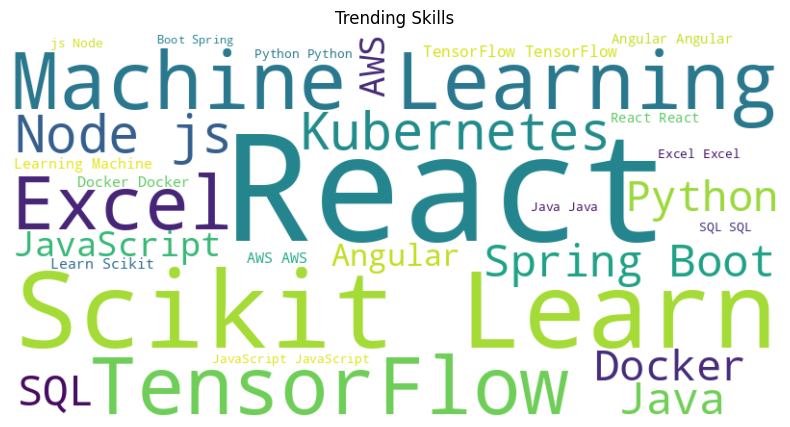

In [10]:
if 'skills' in df.columns:
    all_skills = ' '.join(df['skills'].dropna())
    wc = WordCloud(width=800, height=400, background_color='white').generate(all_skills)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Trending Skills")
    plt.show()


Enter the job domain (e.g., 'Data Science', 'Software Engineering'): Data Science


<ipython-input-11-290b86015bcb>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(avg_salary_by_job.index, rotation=45, ha='right')


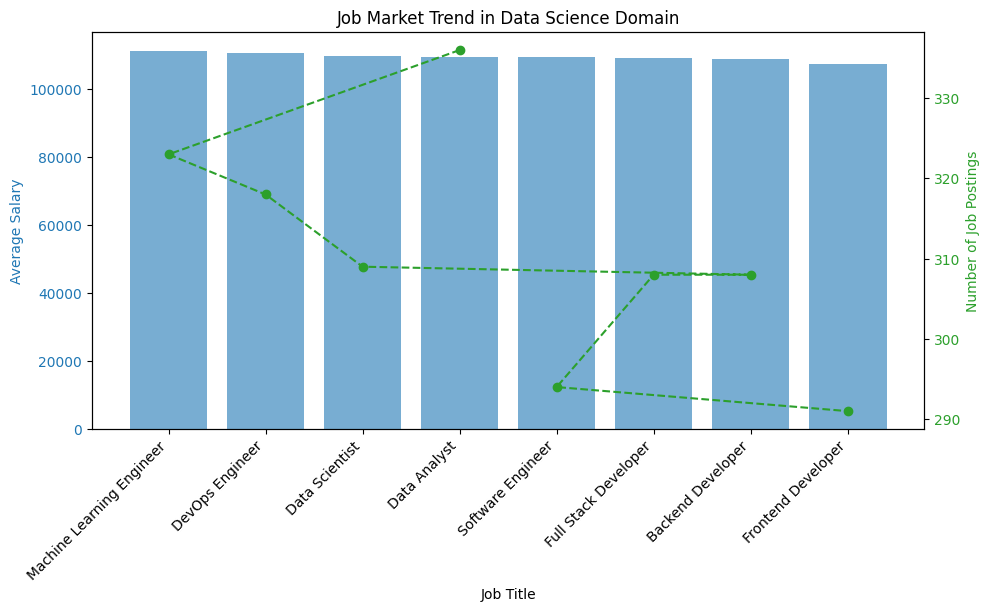

In [11]:
domain_input = input("Enter the job domain (e.g., 'Data Science', 'Software Engineering'): ")

# Filter the dataset based on the domain input
df_filtered = df[df['domain'] == domain_input]

# If no data is found for the domain, exit the program
if df_filtered.empty:
    print(f"No data found for the domain: {domain_input}")
else:
    # Show job market trend based on salary and job count
    # Average salary per job title in the domain
    avg_salary_by_job = df_filtered.groupby('job_title')['salary'].mean().sort_values(ascending=False)

    # Number of job postings per job title in the domain
    job_count_by_title = df_filtered['job_title'].value_counts()

    # Plotting the job market trend (salary vs job postings count)
    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Job Title')
    ax1.set_ylabel('Average Salary', color=color)
    ax1.bar(avg_salary_by_job.index, avg_salary_by_job.values, color=color, alpha=0.6)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticklabels(avg_salary_by_job.index, rotation=45, ha='right')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:green'
    ax2.set_ylabel('Number of Job Postings', color=color)  # we already handled the x-label with ax1
    ax2.plot(job_count_by_title.index, job_count_by_title.values, color=color, marker='o', linestyle='--')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(f"Job Market Trend in {domain_input} Domain")
    plt.show()


Mean Squared Error for Data Science: 695528307.6955267


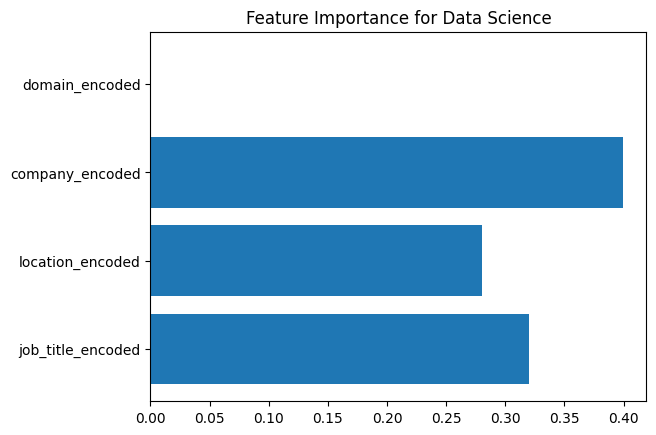

In [12]:
# Cell 6: Prepare Data for Regression Model
# Define features and target variable (Salary)
X = df_filtered[['job_title_encoded', 'location_encoded', 'company_encoded', 'domain_encoded']]  # Independent variables (features)
y = df_filtered['salary']  # Dependent variable (target: salary)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cell 7: Train Random Forest Regression Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions on test data
y_pred = model.predict(X_test)

# Evaluate the model: Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error for {domain_input}: {mse}")

# Feature importance plot
feature_importance = model.feature_importances_
features = X.columns
plt.barh(features, feature_importance)
plt.title(f"Feature Importance for {domain_input}")
plt.show()

In [13]:
# Example input for prediction (job title, location, company, domain)
new_job_title = 'Data Scientist'  # The job title input
new_location = 'New York'  # Example location
new_company = 'XYZ Corp'  # Example company
new_domain = domain_input  # Domain from input

# Check if the job title is unseen during training
if new_job_title not in label_encoder_job_title.classes_:
    new_job_title_encoded = -1  # Use a placeholder value for unseen job titles
else:
    new_job_title_encoded = label_encoder_job_title.transform([new_job_title])[0]

# Encode other features (location, company, domain) as usual
new_data = pd.DataFrame({
    'job_title_encoded': [new_job_title_encoded],  # Handle unseen job title here
    'location_encoded': [label_encoder_location.transform([new_location])[0]],  # Encode location
    'company_encoded': [label_encoder_company.transform([new_company])[0]],  # Encode company
    'domain_encoded': [label_encoder_domain.transform([new_domain])[0]]  # Encode domain
})

# Predict the salary for the new job listing
predicted_salary = model.predict(new_data)
print(f"Predicted Salary for the job in {new_domain}: ${predicted_salary[0]:,.2f}")


Predicted Salary for the job in Data Science: $126,505.52
